# advanced coustomisation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

df = pd.read_csv('C:/Users/Ian/Desktop/panda ex/newdata_jobs4.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = (df['job_skills']
                    .apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x))


In [10]:
df_line = df.explode(column='job_skills').copy()
df_line['job_posted_month'] = df_line['job_posted_date'].dt.strftime('%b')
df_line = df_line[df_line['job_title_short']=='Data Analyst']
skill_list = df_line['job_skills'].value_counts().sort_values(ascending=False).head().index.tolist()
df_line_table = df_line.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size')
df_line_table.reset_index(inplace=True)
df_line_table['job_month_no'] = pd.to_datetime(df_line_table['job_posted_month'], format='%b').dt.month
df_line_table = df_line_table.set_index('job_month_no').sort_index(ascending=True)
df_line_table = df_line_table.set_index('job_posted_month')

Text(0, 0.5, 'no of job postings')

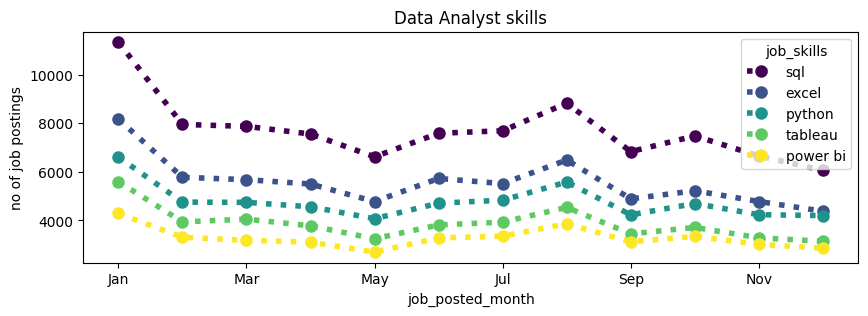

In [74]:
df_line_table[skill_list].plot(kind='line', 
                               linewidth = 4,
                               linestyle=':', #other options '--','-','-.',':'
                               colormap='viridis', # other options 'plasma','onforno', etc check the cheet sheet
                               marker='o', # options '*','x',',','.','1','2','3'....
                               markersize='8',
                               figsize=(10, 3)
                               )
plt.title('Data Analyst skills')
plt.ylabel('no of job postings')